<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº7
#### Federico Borello


## Estimación Espectral de Potencia / Power Spectrum Density (PSD)

In [1]:
# @title: SetUp
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.io as sio
from scipy.io.wavfile import write

from IPython.display import Audio, display, HTML


def vertical_flaten(a):
    return a.reshape(a.shape[0], 1)


def display_audio_with_title(filename, title):
    audio = Audio(filename)
    html_content = f"""
    <div style="text-align: center;">
        <h2>{title}</h2>
        {audio._repr_html_()}
    </div>
    """
    display(HTML(html_content))

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Seteo las Señales

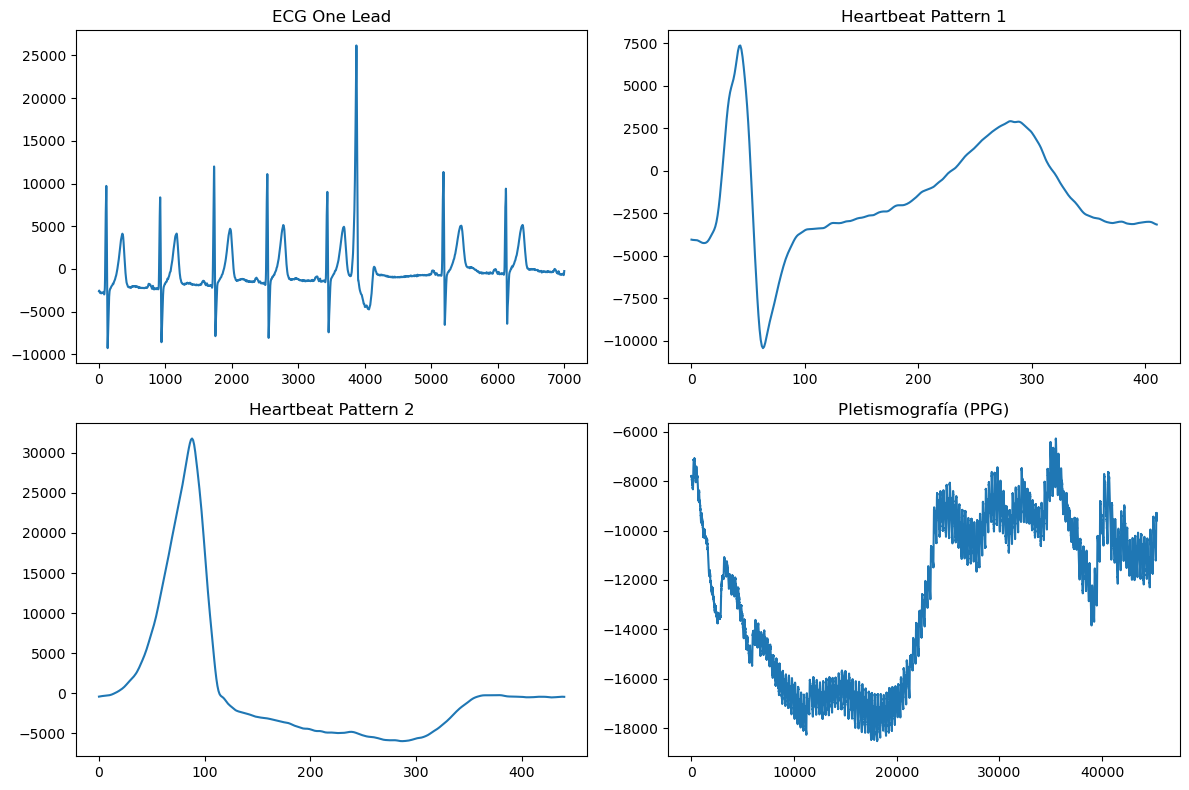

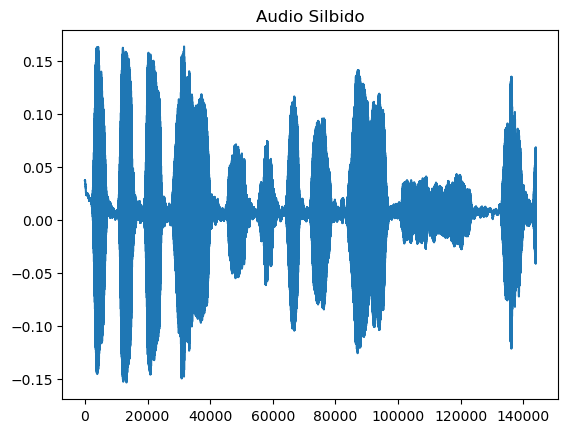

In [9]:
# Audio, ECG, PPG y Código original de la cátedra:
# https://github.com/marianux/pdstestbench/blob/4daeac9affd62217f4bafb8d7b8ec20834ba2a14/lectura_sigs.py

#######################################
# Lectura de Electrocardiograma (ECG) #
#######################################

fs_ecg = 1000  # Hz

mat_struct = sio.loadmat("./ECG_TP4.mat")

ecg_one_lead = vertical_flaten(mat_struct["ecg_lead"])
ecg_one_lead = ecg_one_lead[5000:12000]

hb_1 = vertical_flaten(mat_struct["heartbeat_pattern1"])
hb_2 = vertical_flaten(mat_struct["heartbeat_pattern2"])

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(ecg_one_lead)
plt.title("ECG One Lead")

plt.subplot(2, 2, 2)
plt.plot(hb_1)
plt.title("Heartbeat Pattern 1")

plt.subplot(2, 2, 3)
plt.plot(hb_2)
plt.title("Heartbeat Pattern 2")



####################################
# Lectura de Pletismografía (PPG)  #
####################################

fs_ppg = 400  # Hz

# Cargar el archivo CSV como un array de NumPy
ppg = np.genfromtxt(
    "PPG.csv", delimiter=",", skip_header=1
)  # Omitir la cabecera si existe

plt.subplot(2, 2, 4)
plt.plot(ppg)
plt.title("Pletismografía (PPG)")
plt.tight_layout()
plt.show()

####################
# Lectura de audio #
####################

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
# fs_audio, wav_data = sio.wavfile.read('prueba psd.wav')
# fs_audio, wav_data = sio.wavfile.read("silbido.wav")

plt.figure()
plt.plot(wav_data)
plt.title("Audio Silbido")

display_audio_with_title("silbido.wav", "Silbido")
display_audio_with_title("la cucaracha.wav", "La Cucaracha")

# Cálculo de la Estimación Espectral de Potencia

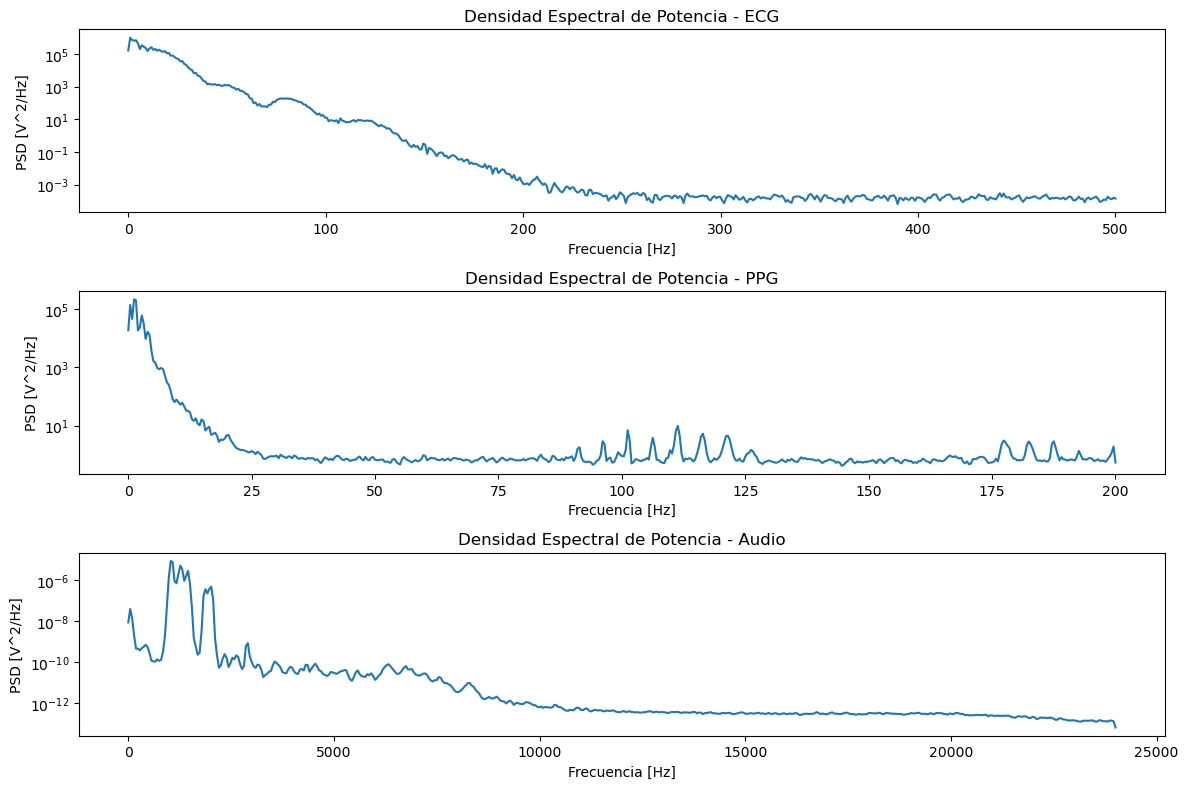

In [10]:
def calculate_psd(signal_data, fs):
    f, Pxx = signal.welch(signal_data, fs, nperseg=1024)
    return f, Pxx

# Para ECG
f_ecg, Pxx_ecg = calculate_psd(ecg_one_lead.flatten(), fs_ecg)

# Para PPG
f_ppg, Pxx_ppg = calculate_psd(ppg.flatten(), fs_ppg)

# Para Audio
f_audio, Pxx_audio = calculate_psd(wav_data, fs_audio)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.semilogy(f_ecg, Pxx_ecg)
plt.title('Densidad Espectral de Potencia - ECG')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V^2/Hz]')

plt.subplot(3, 1, 2)
plt.semilogy(f_ppg, Pxx_ppg)
plt.title('Densidad Espectral de Potencia - PPG')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V^2/Hz]')

plt.subplot(3, 1, 3)
plt.semilogy(f_audio, Pxx_audio)
plt.title('Densidad Espectral de Potencia - Audio')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V^2/Hz]')

plt.tight_layout()
plt.show()